In [15]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

In [22]:
# Data of Anjani, Bhargavi and Surada for training the model
df_features = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile.csv")
X_train_data = df_features.values[:, 1:44]
y_train_data = df_features.values[:, 44]
usersList = set(df_features.values[:,0])
print("Users for training the model")
print(usersList)
# Data of 12 people for testing the model
df_features_test = pd.read_csv("H:/mastersProject/activity_analyzer/LogisticRegression/Data/featuresfile_10.csv")
X_test = df_features_test.values[:, 2:45]
y_test = df_features_test.values[:, 45]
usersList = set(df_features_test.values[:,0])
print("Users for testing the model")
print(usersList)

Users for training the model
{'Anjani', 'Surada', 'Bhargavi'}
Users for testing the model
{'ahsu6', 'achan', 'jding11', 'mbaybay', 'rpshah2', 'pgarg', 'Chai', 'bbalasubramanian', 'npbandal', 'sbgavade', 'ptiwari3', 'cjain'}


In [17]:
# Fitting the logistic regression model
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_data, y_train_data)
predict = lr.predict(X_test)
logisticRegScore = lr.score(X_test, y_test)
print("Importance of features")
print(lr.coef_)
print("Logistic regression Score")
print(logisticRegScore)

Importance of features
[[-0.04428713 -0.10980405 -0.09281945 -0.02975576 -0.07048953 -0.04791663
   0.19319413  0.06625453 -0.28487191 -0.14588925 -0.05611415 -0.3902119
  -0.53819686 -0.44442756 -0.01878854 -0.14648825  0.32435065  0.38147093
   0.15674629  0.01363013 -0.05527147 -0.04656041  0.41339789  0.14532732
   0.16133763 -0.29539818 -0.43668888 -0.14776003 -0.07336433 -0.18017453
   0.09129413  0.48563653  0.35681367 -4.40927205 -3.82667241 -1.13283029
   1.60704672  1.12371103 -3.96590168 -4.86073903 -4.23544345 -0.60632588
   0.36074301]]
Logistic regression Score
0.868725868726


In [34]:
# Confusion matrix analysis
cm = confusion_matrix(y_test, predict)
print(cm)

[[237  21]
 [ 47 213]]


Confusion matrix, without normalization
[[237  21]
 [ 47 213]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.18  0.82]]


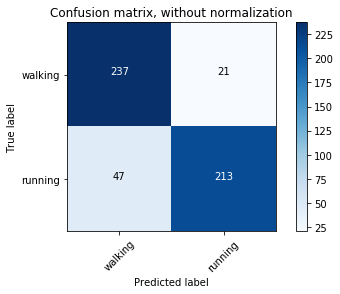

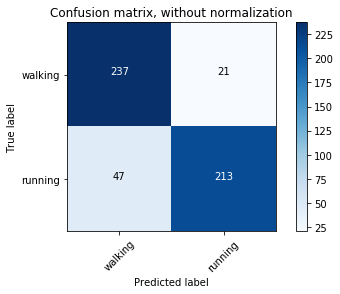

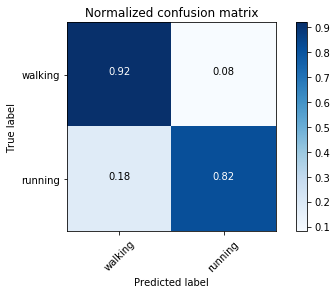

In [32]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ["walking", "running"]
plot_confusion_matrix(cnf_matrix, classes=["walking", "running"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()